### CITIBIKE ANALYSIS PROJECT


#### Libraries

In [1]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import plotly.express as px

#display the graphs
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

### Reading Dataset


In [2]:
#read the csv file into a dataframe
geo_df = pd.read_csv('/Users/drushti/Documents/PythonProject/CitiBike/geo_df.csv')
geo_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zip_start,zip_end
0,D68047AAA9A72501,classic_bike,2022-08-12 18:14:45,2022-08-12 18:21:23,Columbus Drive,JC014,Hamilton Park,JC009,40.718355,-74.038914,...,Friday,Friday,18,18,August,6.63,POINT (-74.03891444206238 40.71835519823214),414.0,7302,7302
1,E5B82A9F588A7650,classic_bike,2022-08-19 01:04:39,2022-08-19 01:14:10,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,8 St & Washington St,HB603,40.736982,-74.027781,...,Friday,Friday,1,1,August,9.52,POINT (-74.02778059244156 40.73698221818716),549.0,7030,7030
2,AA0DBFF220DA98F6,classic_bike,2022-08-21 13:43:05,2022-08-21 13:53:13,Columbus Drive,JC014,Montgomery St,JC099,40.718355,-74.038914,...,Sunday,Sunday,13,13,August,10.13,POINT (-74.03891444206238 40.71835519823214),414.0,7302,7302
3,8F11D340492FCD32,electric_bike,2022-08-04 22:02:12,2022-08-04 22:21:31,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Pershing Field,JC024,40.736982,-74.027781,...,Thursday,Thursday,22,22,August,19.32,POINT (-74.02778059244156 40.73698221818716),549.0,7030,7307
4,48FF219B87E90004,electric_bike,2022-08-08 14:02:48,2022-08-08 14:16:11,Columbus Drive,JC014,Fairmount Ave,JC093,40.718355,-74.038914,...,Monday,Monday,14,14,August,13.38,POINT (-74.03891444206238 40.71835519823214),414.0,7302,7306


In [3]:
# Number of Trip that started at ended at same location vs different location
all_same = geo_df[geo_df['zip_start'] == geo_df['zip_end']]
all_diff = geo_df[geo_df['zip_start'] != geo_df['zip_end']]

#### COMBINED TRIPS STATION LOCATION & ZIPCODE- SAME AND DIFFERENT 

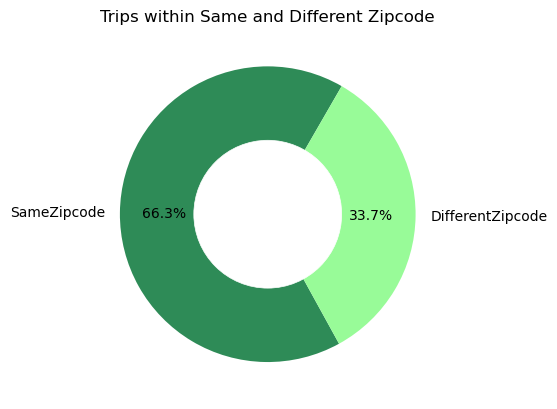

In [4]:
# Number of Trip that started at ended at same location vs different location - plotting graph
# library
import matplotlib.pyplot as plt
 
# create data
names = ['SameZipcode','DifferentZipcode']
size = [all_same.shape[0],all_diff.shape[0]]
 
# Create a circle at the center of the plot
my_circle = plt.Circle((0,0), 0.5, color='white')

# Not enough colors --> colors will cycle
plt.pie(size, labels=names, colors=['seagreen','palegreen'],labeldistance = 1.1,
        rotatelabels = False, autopct='%1.1f%%', pctdistance = .7, startangle = 60)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Trips within Same and Different Zipcode',fontsize=12)

# Show the graph
plt.show()

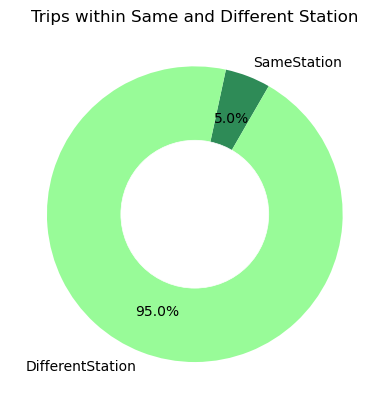

In [5]:
# Number of Trip that started at ended at same location vs different location
all_same1 = geo_df[geo_df['start_station_name'] == geo_df['end_station_name']]
all_diff1 = geo_df[geo_df['start_station_name'] != geo_df['end_station_name']]


# Number of Trip that started at ended at same location vs different location - plotting graph
# library
import matplotlib.pyplot as plt
 
# create data
names = ['SameStation','DifferentStation']
size = [all_same1.shape[0],all_diff1.shape[0]]
 
# Create a circle at the center of the plot
my_circle = plt.Circle((0,0), 0.5, color='white')

# Not enough colors --> colors will cycle
plt.pie(size, labels=names, colors=['seagreen','palegreen'],labeldistance = 1.1,
        rotatelabels = False, autopct='%1.1f%%', pctdistance = .7, startangle = 60)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Trips within Same and Different Station',fontsize=12)

# Show the graph
plt.show()

In [6]:
member_df = geo_df[geo_df['member_casual'] == 'member']
casual_df = geo_df[geo_df['member_casual'] == 'casual']

#### MEMBER TRIPS STATION LOCATION & ZIPCODE- SAME AND DIFFERENT 

In [7]:
# Number of Trip that started at ended at same location vs different location
start_end_same2 = member_df[member_df['zip_start'] == member_df['zip_end']]
start_end_diff2 = member_df[member_df['zip_start'] != member_df['zip_end']]

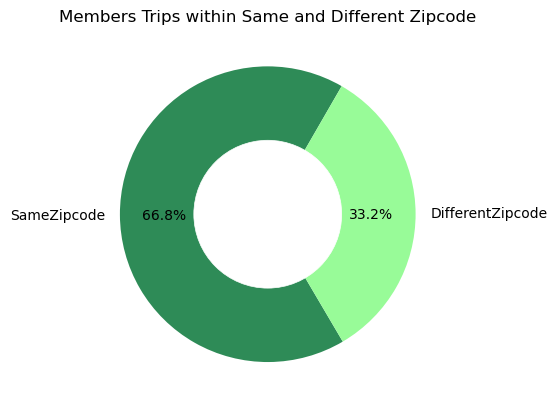

In [8]:
# Number of Trip that started at ended at same location vs different location - plotting graph
# library
import matplotlib.pyplot as plt
 
# create data
names = ['SameZipcode','DifferentZipcode']
size = [start_end_same2.shape[0],start_end_diff2.shape[0]]
 
# Create a circle at the center of the plot
my_circle = plt.Circle((0,0), 0.5, color='white')

# Not enough colors --> colors will cycle
plt.pie(size, labels=names, colors=['seagreen','palegreen'],labeldistance = 1.1,
        rotatelabels = False, autopct='%1.1f%%', pctdistance = .7, startangle = 60)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Members Trips within Same and Different Zipcode',fontsize=12)


# Show the graph
plt.show()

In [9]:
# Number of Trip that started at ended at same location vs different location
start_end_same3 = member_df[member_df['start_station_name'] == member_df['end_station_name']]
start_end_diff3 = member_df[member_df['start_station_name'] != member_df['end_station_name']]

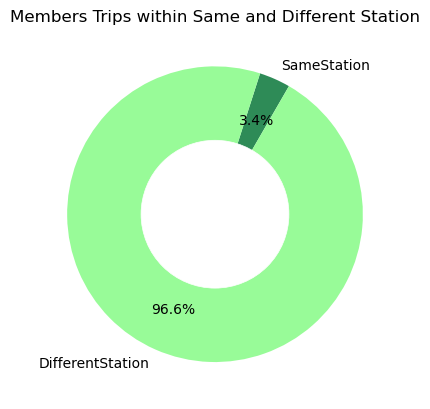

In [10]:
# Number of Trip that started at ended at same location vs different location - plotting graph
# library
import matplotlib.pyplot as plt
 
# create data
names = ['SameStation','DifferentStation']
size = [start_end_same3.shape[0],start_end_diff3.shape[0]]
 
# Create a circle at the center of the plot
my_circle = plt.Circle((0,0), 0.5, color='white')

# Not enough colors --> colors will cycle
plt.pie(size, labels=names, colors=['seagreen','palegreen'],labeldistance = 1.1,
        rotatelabels = False, autopct='%1.1f%%', pctdistance = .7, startangle = 60)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Members Trips within Same and Different Station',fontsize=12)


# Show the graph
plt.show()

#### CASUAL TRIPS STATION LOCATION & ZIPCODE- SAME AND DIFFERENT 

In [11]:
# Number of Trip that started at ended at same location vs different location
cas_start_end_same4 = casual_df[casual_df['zip_start'] == casual_df['zip_end']]
cas_start_end_diff4 = casual_df[casual_df['zip_start'] != casual_df['zip_end']]

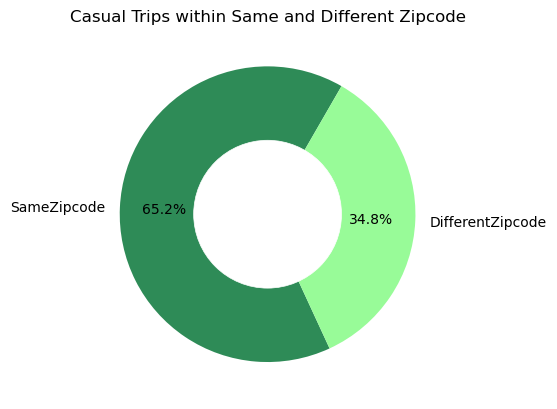

In [12]:
# Number of Trip that started at ended at same location vs different location - plotting graph
# library
import matplotlib.pyplot as plt
 
# create data
names = ['SameZipcode','DifferentZipcode']
size = [cas_start_end_same4.shape[0],cas_start_end_diff4.shape[0]]
 
# Create a circle at the center of the plot
my_circle = plt.Circle((0,0), 0.5, color='white')

# Not enough colors --> colors will cycle
plt.pie(size, labels=names, colors=['seagreen','palegreen'],labeldistance = 1.1,
        rotatelabels = False, autopct='%1.1f%%', pctdistance = .7, startangle = 60)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Casual Trips within Same and Different Zipcode',fontsize=12)

# Show the graph
plt.show()

In [13]:
# Number of Trip that started at ended at same location vs different location
cas_start_end_same4 = casual_df[casual_df['start_station_name'] == casual_df['end_station_name']]
cas_start_end_diff4 = casual_df[casual_df['start_station_name'] != casual_df['end_station_name']]

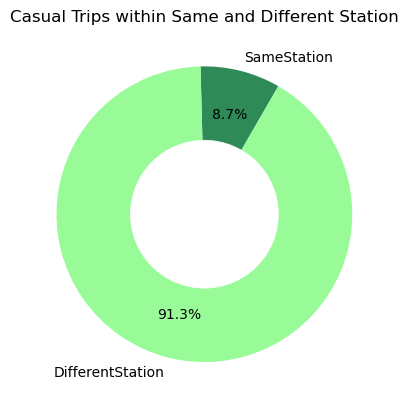

In [14]:
# Number of Trip that started at ended at same location vs different location - plotting graph
# library
import matplotlib.pyplot as plt
 
# create data
names = ['SameStation','DifferentStation']
size = [cas_start_end_same4.shape[0],cas_start_end_diff4.shape[0]]
 
# Create a circle at the center of the plot
my_circle = plt.Circle((0,0), 0.5, color='white')

# Not enough colors --> colors will cycle
plt.pie(size, labels=names, colors=['seagreen','palegreen'],labeldistance = 1.1,
        rotatelabels = False, autopct='%1.1f%%', pctdistance = .7, startangle = 60)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Casual Trips within Same and Different Station',fontsize=12)

# Show the graph
plt.show()